In [ ]:
  !nvidia-smi

Sun May 21 09:55:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# New Section

In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2023-05-21 09:55:37--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   115MB/s    in 3.5s    

2023-05-21 09:55:41 (117 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’ saved [430460776/430460776]

dpkg: warning: downgrading libcudnn8 from 8.7.0.84-1+cuda11.8 to 8.1.0.77-1+cuda11.2
(Reading database ... 122400 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.7.0.84-1+cuda11.8) ...
Setting up libcudnn8 (8.1.0.77-1+c

In [ ]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
%matplotlib inline

--2023-05-21 09:57:38--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0.01s   

2023-05-21 09:57:38 (5.18 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
   creating: maskrcnn_colab/
   creating: maskrcnn_colab/mrcnn_demo/
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcnn_demo/visualize.py 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
from maskrcnn_colab.mrcnn_demo.m_rcnn import extract_images, load_image_dataset, display_image_samples, load_training_model, train_head, CustomConfig, load_test_model, test_random_image
from maskrcnn_colab.mrcnn_demo.visualize import random_colors, get_mask_contours, draw_mask

VERS 0.4 - updated 04/08/2022


/content/maskrcnn_colab/mrcnn_demo/model.py:2378: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


... done downloading pretrained model!


In [ ]:
# Extract Images
images_path = "drive/MyDrive/ML/colour_images.zip"
annotations_path = "drive/MyDrive/ML/final2.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 442 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/ML/final2.json
Annotation json path:  /content/drive/MyDrive/ML/final2.json
Train: 393
Validation: 49
Classes: 1


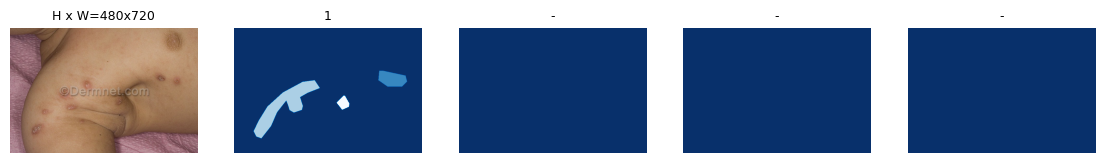

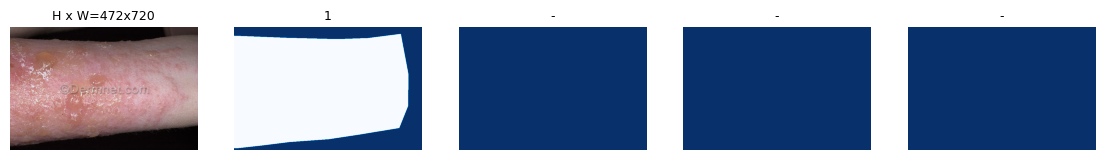

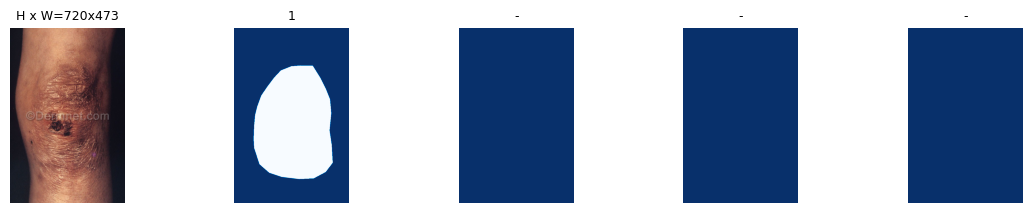

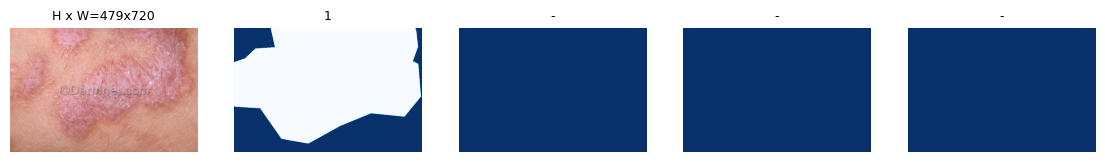

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

/content/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
pip install -U scikit-image==0.16.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 88.9 MB/s eta 0:00:00
  Created wheel for scikit-image: filename=scikit_image-0.16.2-cp39-cp39-linux_x86_64.whl size=44237737 sha256=9dc9e4b3733016b4863db2b5950a86e4525f29220263f1c773fe6a9c3aa7a6e4
  Stored in directory: /root/.cache/pip/wheels/fe/20/5c/23218d242dbd520f9997774bab1fb0526e29db47435debb3ba
Successfully built scikit-image
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
ERROR: pip's dependency resolver does not currently t

In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20230521T1036/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/maskrcnn_colab/logs/object20230521T1036/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


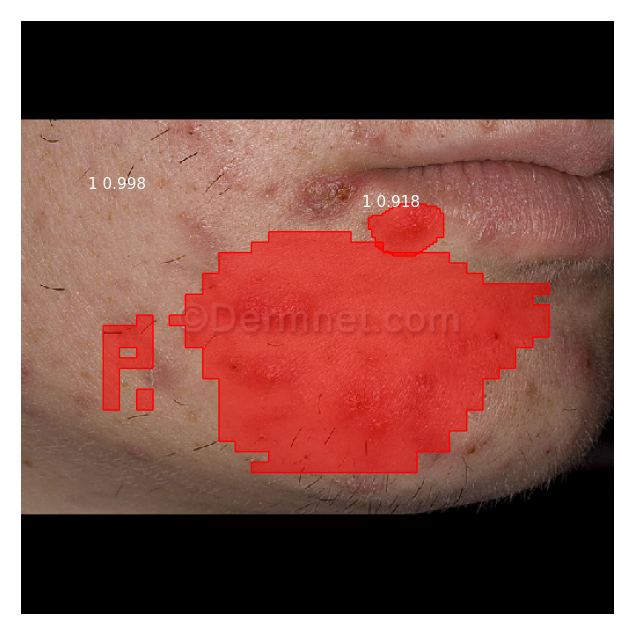

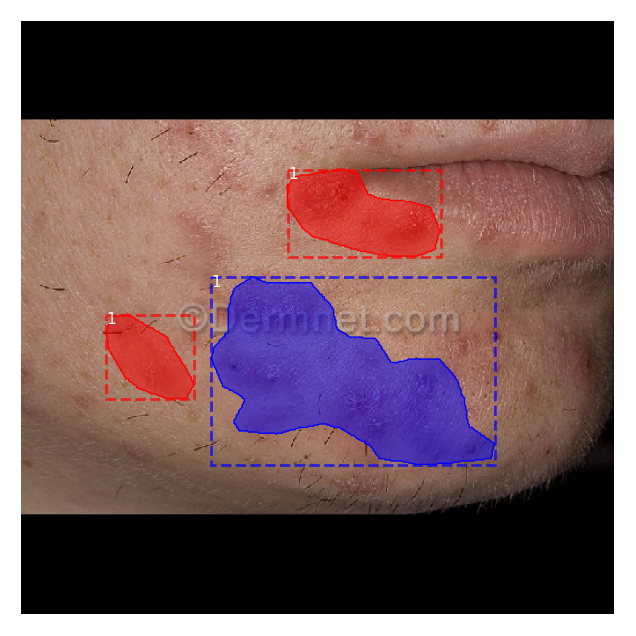

In [ ]:
# Test on a random image
from maskrcnn_colab.mrcnn_demo.m_rcnn import *
test_random_image(test_model, dataset_val, inference_config)

In [ ]:
import random
from PIL import Image
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2

In [ ]:
from maskrcnn_colab.mrcnn_demo.m_rcnn import *

#load model
modelPath = "/content/drive/MyDrive/ML/mask_rcnn_object.h5"
test_model, inference_config = load_inference_model(1, modelPath)

Loading weights from  /content/drive/MyDrive/ML/mask_rcnn_object.h5


In [ ]:
image_num=0
directory = '/content/drive/MyDrive/ML/colour_images/'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f) and filename.endswith('.jpg'):
        image_num+=1
image_num

442

In [ ]:
def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

In [ ]:
from google.colab.patches import cv2_imshow

def mask_image(path_):
    img = cv2.imread(path_)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Detect results
    r = test_model.detect([image])[0]
    colors = random_colors(80)
    # Get Coordinates and show it on the image
    object_count = len(r["class_ids"])
    pixels = 0
    for i in range(object_count):
      # 1. Mask
      mask = r["masks"][:, :, i]
      contours = get_mask_contours(mask)
      for cnt in contours:
        pixels += cv2.contourArea(cnt)
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

    image_area = img.shape[0] * img.shape[1]
    area_ratio = (pixels / image_area) * 100
    return img, pixels, area_ratio, image_area

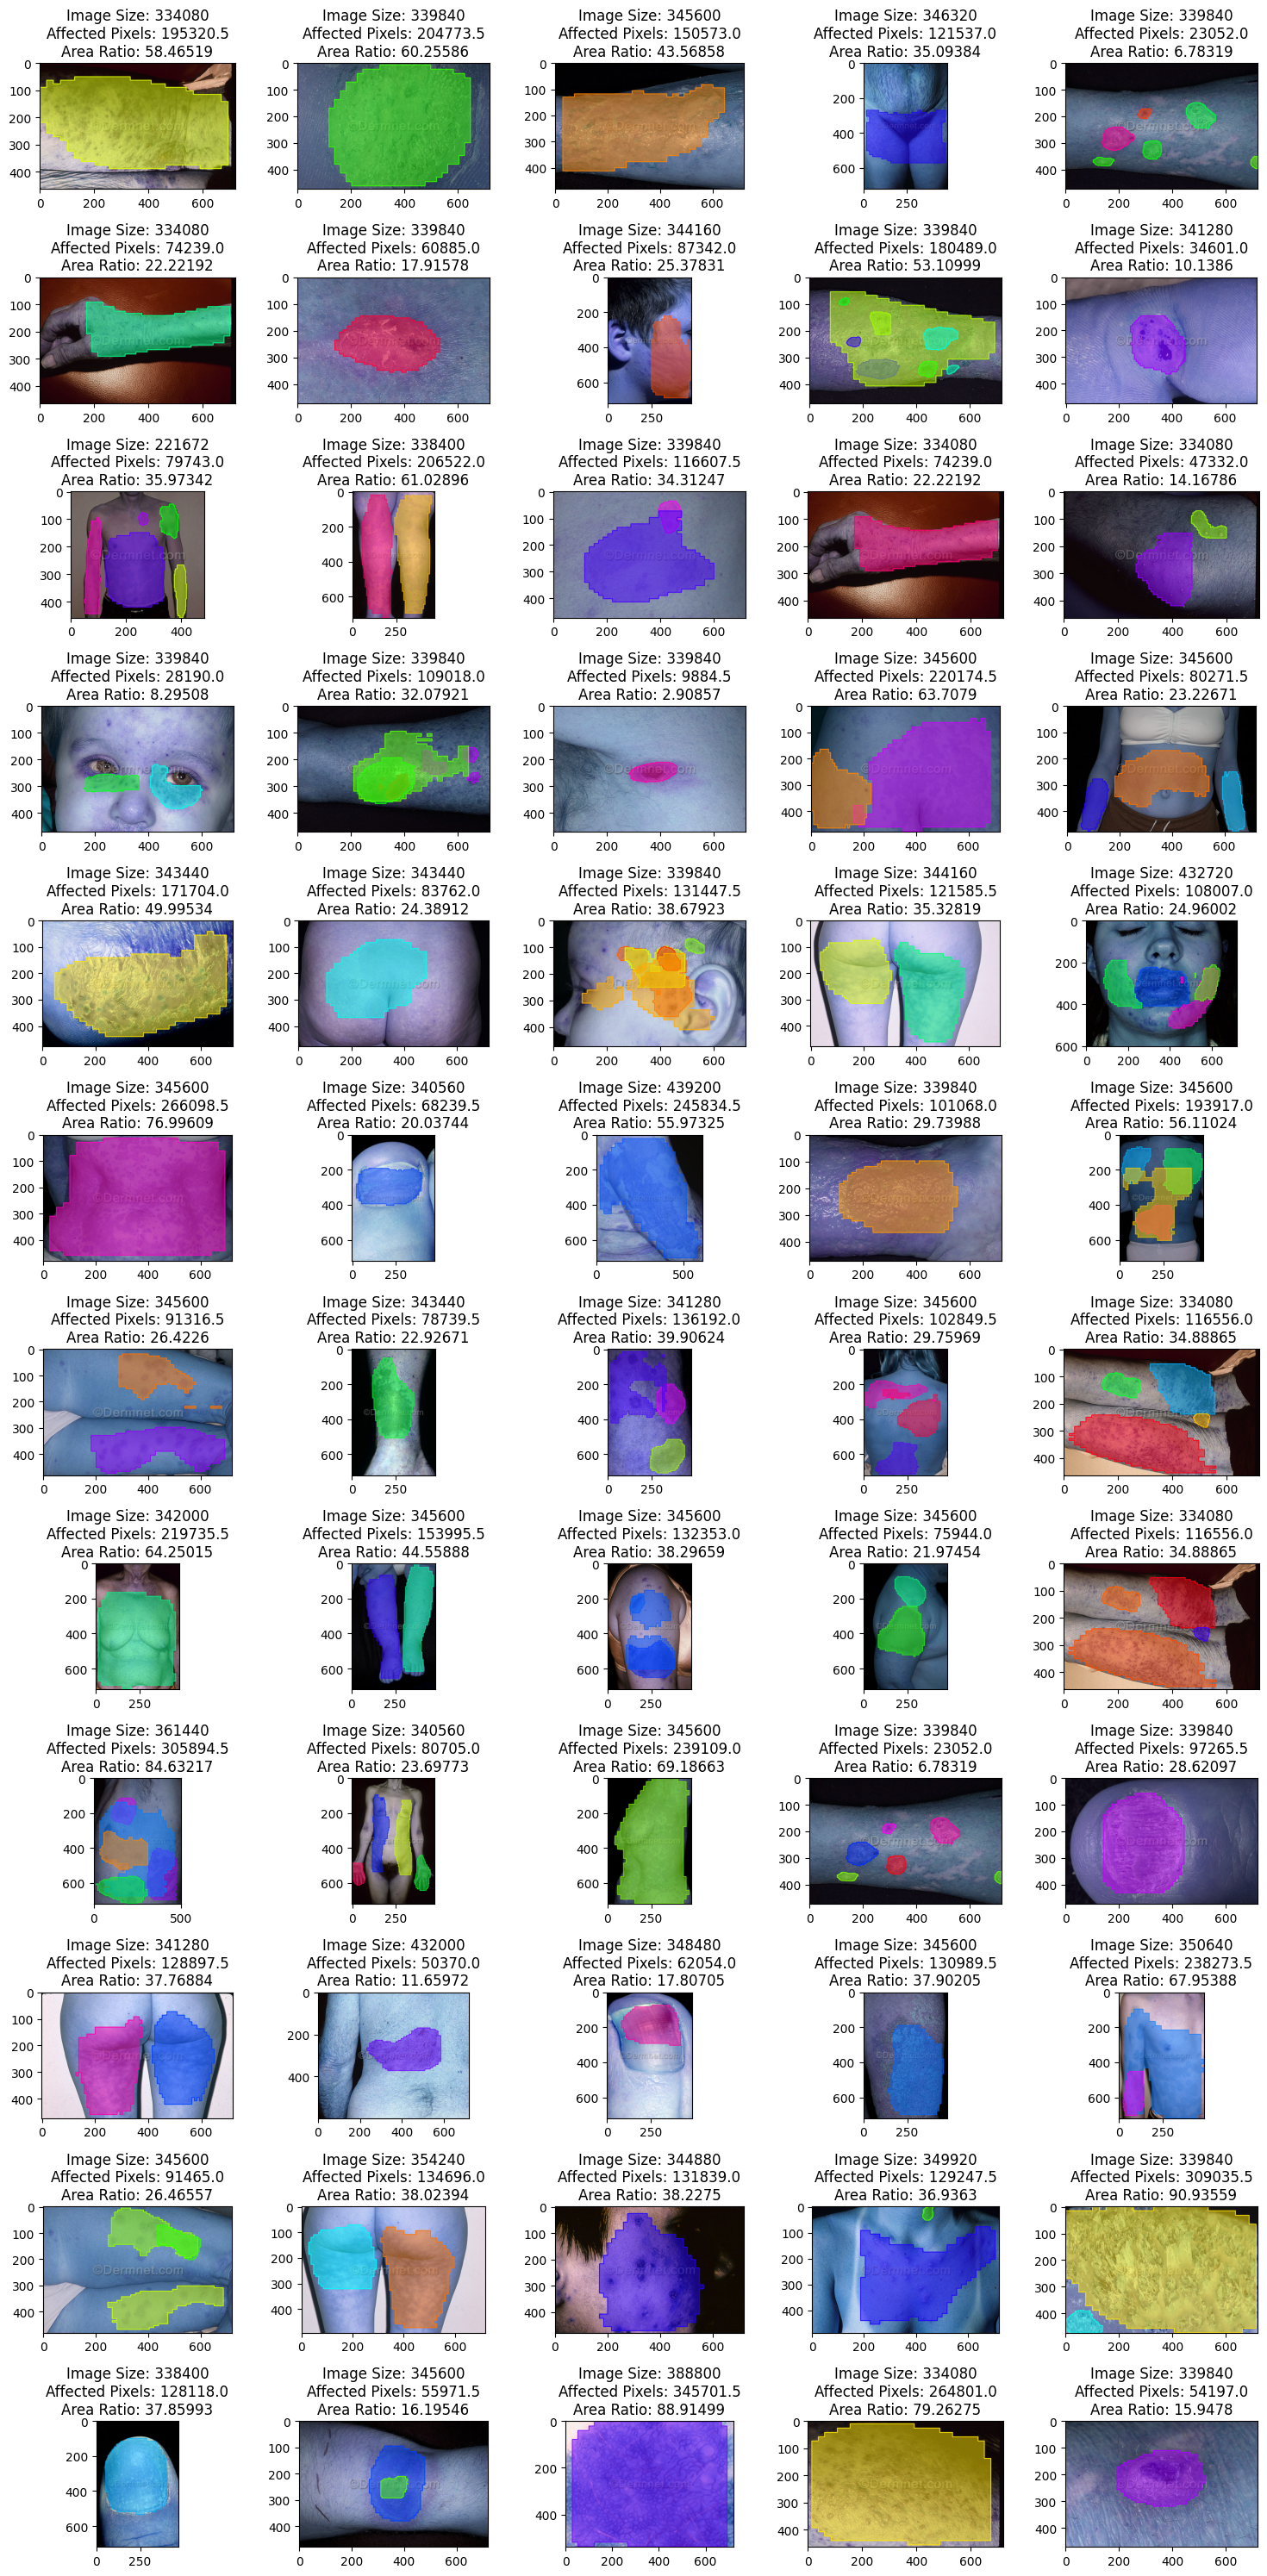

In [ ]:
cols = 5
image_num = 60
rows = image_num//cols + (1 if image_num%cols>0 else 0)
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,30))#manipulate display area

dir = '/content/drive/MyDrive/ML/colour_images/' #test path

path_arr = []

for filename in os.listdir(dir):
    path = os.path.join(dir, filename)
    path_arr.append(path)

img_count = 0
for i in range(rows):
    for j in range(cols):
        if img_count < image_num:
          img, pixels, area_ratio, image_area = mask_image(path_arr[img_count])
          axes[i, j].imshow(img)
          axes[i, j].set_title('Image Size: {size}\nAffected Pixels: {area}\nArea Ratio: {per}'.format(size=image_area,area=pixels,per=round(area_ratio,5)))
        img_count+=1

plt.tight_layout()
plt.show()

In [ ]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from maskrcnn_colab.mrcnn_demo.config import Config
from maskrcnn_colab.mrcnn_demo.model import MaskRCNN
from maskrcnn_colab.mrcnn_demo.utils import Dataset
from maskrcnn_colab.mrcnn_demo.utils import compute_ap, compute_recall
from maskrcnn_colab.mrcnn_demo.model import load_image_gt
from maskrcnn_colab.mrcnn_demo.model import mold_image



class PredictionConfig(Config):
	NAME = "disease_masking_cfg"
	NUM_CLASSES = 1 
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

In [ ]:
def evaluate_model(dataset, model, cfg):
  APs = list(); 
  ARs = list(); 
  for image_id in dataset.image_ids:
    image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
    scaled_image = mold_image(image, cfg)
    sample = expand_dims(scaled_image, 0)
    yhat = model.detect(sample, verbose=0)
    r = yhat[0]
    AP, precisions, recalls, overlaps = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
    AR, positive_ids = compute_recall(r["rois"], gt_bbox, iou=0.2)
    ARs.append(AR)
    APs.append(AP)
	
  mAP = mean(APs)
  mAR = mean(ARs)
  return mAP, mAR, F1_scores

In [ ]:
cfg = PredictionConfig()
mAP, mAR, F1_score = evaluate_model(dataset_val, test_model, cfg)

In [ ]:
print("Mean Average Precision: {val} %".format(val=round(mAP*100, 3)))
print("Mean Average Recall: {val} %".format(val=round(mAR*100, 3)))

F1_score = (2 * mAP * mAR)/(mAP + mAR) * 100
print("F1-score: {val} %".format(val=round(F1_score, 3)))

Mean Average Precision: 57.653 %
Mean Average Recall: 84.694 %
F1-score: 68.605 %


In [ ]:
def mask_image_old(path_):
    img = cv2.imread(path_)
    img = cv2.bitwise_not(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,255,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
    pixels = cv2.countNonZero(thresh)
    image_area = img.shape[0] * img.shape[1]
    area_ratio = (pixels / image_area) * 100
    return thresh, area_ratio,pixels, pixels, image_area

In [ ]:
def plotComparison(complt_dict, count, start=0):
  cols = 3
  fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,30) )#manipulate display area
  for i in range(count):
    curObj = complt_dict[start + i]
    img = curObj["rcnn"]["img"]
    size = curObj["rcnn"]["size"]
    area = curObj["rcnn"]["area"]
    per = curObj["rcnn"]["per"]
    axes[i, 0].imshow(img)
    axes[i, 0].set_title('Image Size: {size}\nAffected Pixels: {area}\nArea Ratio: {per}'.format(size=size,area=area,per=round(per,5)))
    thresh = curObj["img"]["img"]
    size1 = curObj["img"]["size"]
    area1 = curObj["img"]["area"]
    per1 = curObj["img"]["per"]
    axes[i, 1].imshow(thresh)
    axes[i, 1].set_title('Image Size: {size}\nAffected Pixels: {area}\nArea Ratio: {per}'.format(size=size1,area=area1,per=round(per1,5)))
    improvement = round((abs(per - per1) / min(per, per1)) * 100, 2)
    axes[i, 2].text(0.3, 0.5, 'Improvement = {val}%'.format(val=improvement))
    axes[i, 2].axis('off')
  plt.tight_layout()
  plt.show()

def getComparison(directory):
  image_num=0
  for filename in os.listdir(directory):
      f = os.path.join(directory, filename)
      if os.path.isfile(f) and filename.endswith('.jpg'):
          image_num+=1

  path_arr = []

  for filename in os.listdir(directory):
      path = os.path.join(directory, filename)
      path_arr.append(path)

  img_dict = {}
  complt_dict = {}

  for i in range(image_num):
    img, pixels, area_ratio, image_area = mask_image(path_arr[i])
    thresh, area_ratio1,area_affected,pixels1,image_area1 = mask_image_old(path_arr[i])
    img_dict[i] = (area_ratio, area_ratio1)
    complt_dict[i] = {
        "rcnn": { "per": area_ratio, "size": image_area, "area": pixels, "img": img },
        "img": { "per": area_ratio1, "size": image_area1, "area": pixels1, "img": thresh }
    }

  return img_dict, complt_dict

In [ ]:
img_dict, complt_dict = getComparison('/content/drive/MyDrive/ML/colour_images/')

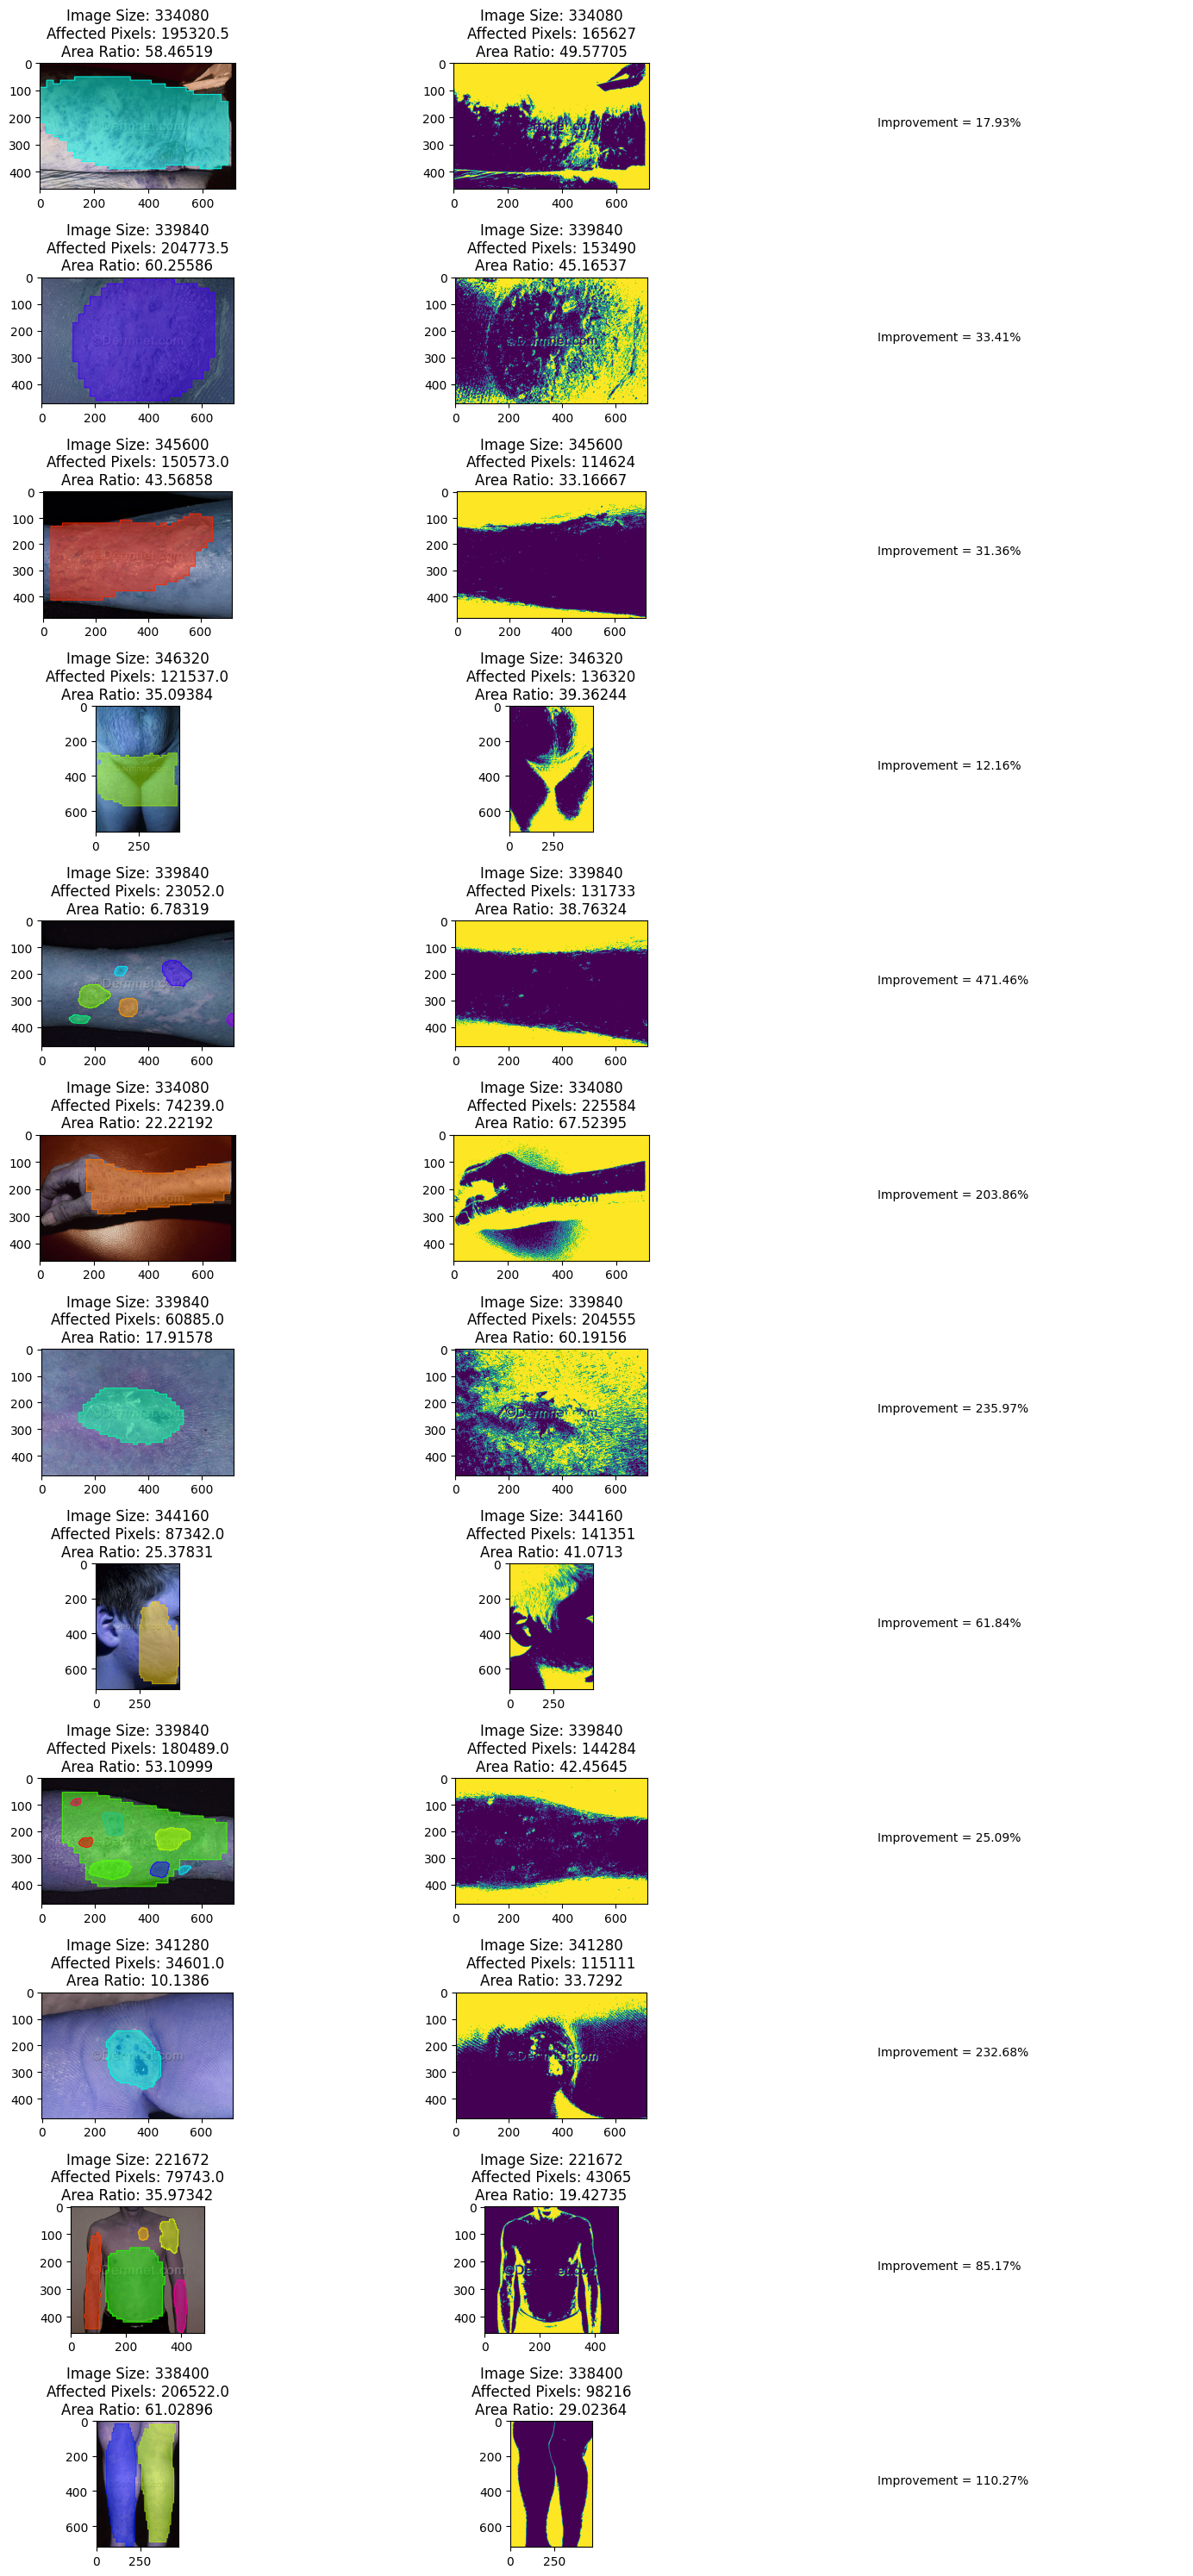

In [ ]:
plotComparison(complt_dict, 12)

In [ ]:
def plotImprovemnet(dict_, count=None):
  rcnnValues = []
  imageProcessingValues = []
  improvementValues = []

  (keys, values) = (list(dict_.keys())[:count], list(dict_.values())[:count]) if count is not None else (dict_.keys(), dict_.values())
  for (rcnnVal, imgPr) in values:
    rcnnValues.append(rcnnVal)
    imageProcessingValues.append(imgPr)
    denom = min(imgPr, rcnnVal)
    improve = (abs(rcnnVal - imgPr)/ denom if denom != 0 else 100) * 100
    improvementValues.append(improve)
    
  improvementGain = sum(improvementValues)/len(improvementValues)
  print('Average Improvement Gain : {val}%\n'.format(val=round(improvementGain, 2)))

  figure, axis = plt.subplots(2, 1, figsize=(30,30))
  
  axis[0].plot(keys, rcnnValues, label = "rcnn")
  axis[0].plot(keys, imageProcessingValues, label = "image processing")
  axis[0].set_title("Comparison Plot")
  axis[0].legend()

  axis[1].plot(keys, improvementValues, label = "improvement")
  axis[1].set_title("Improvement Plot")
  axis[1].legend()
  plt.show()

Average Improvement Gain : 110.96%



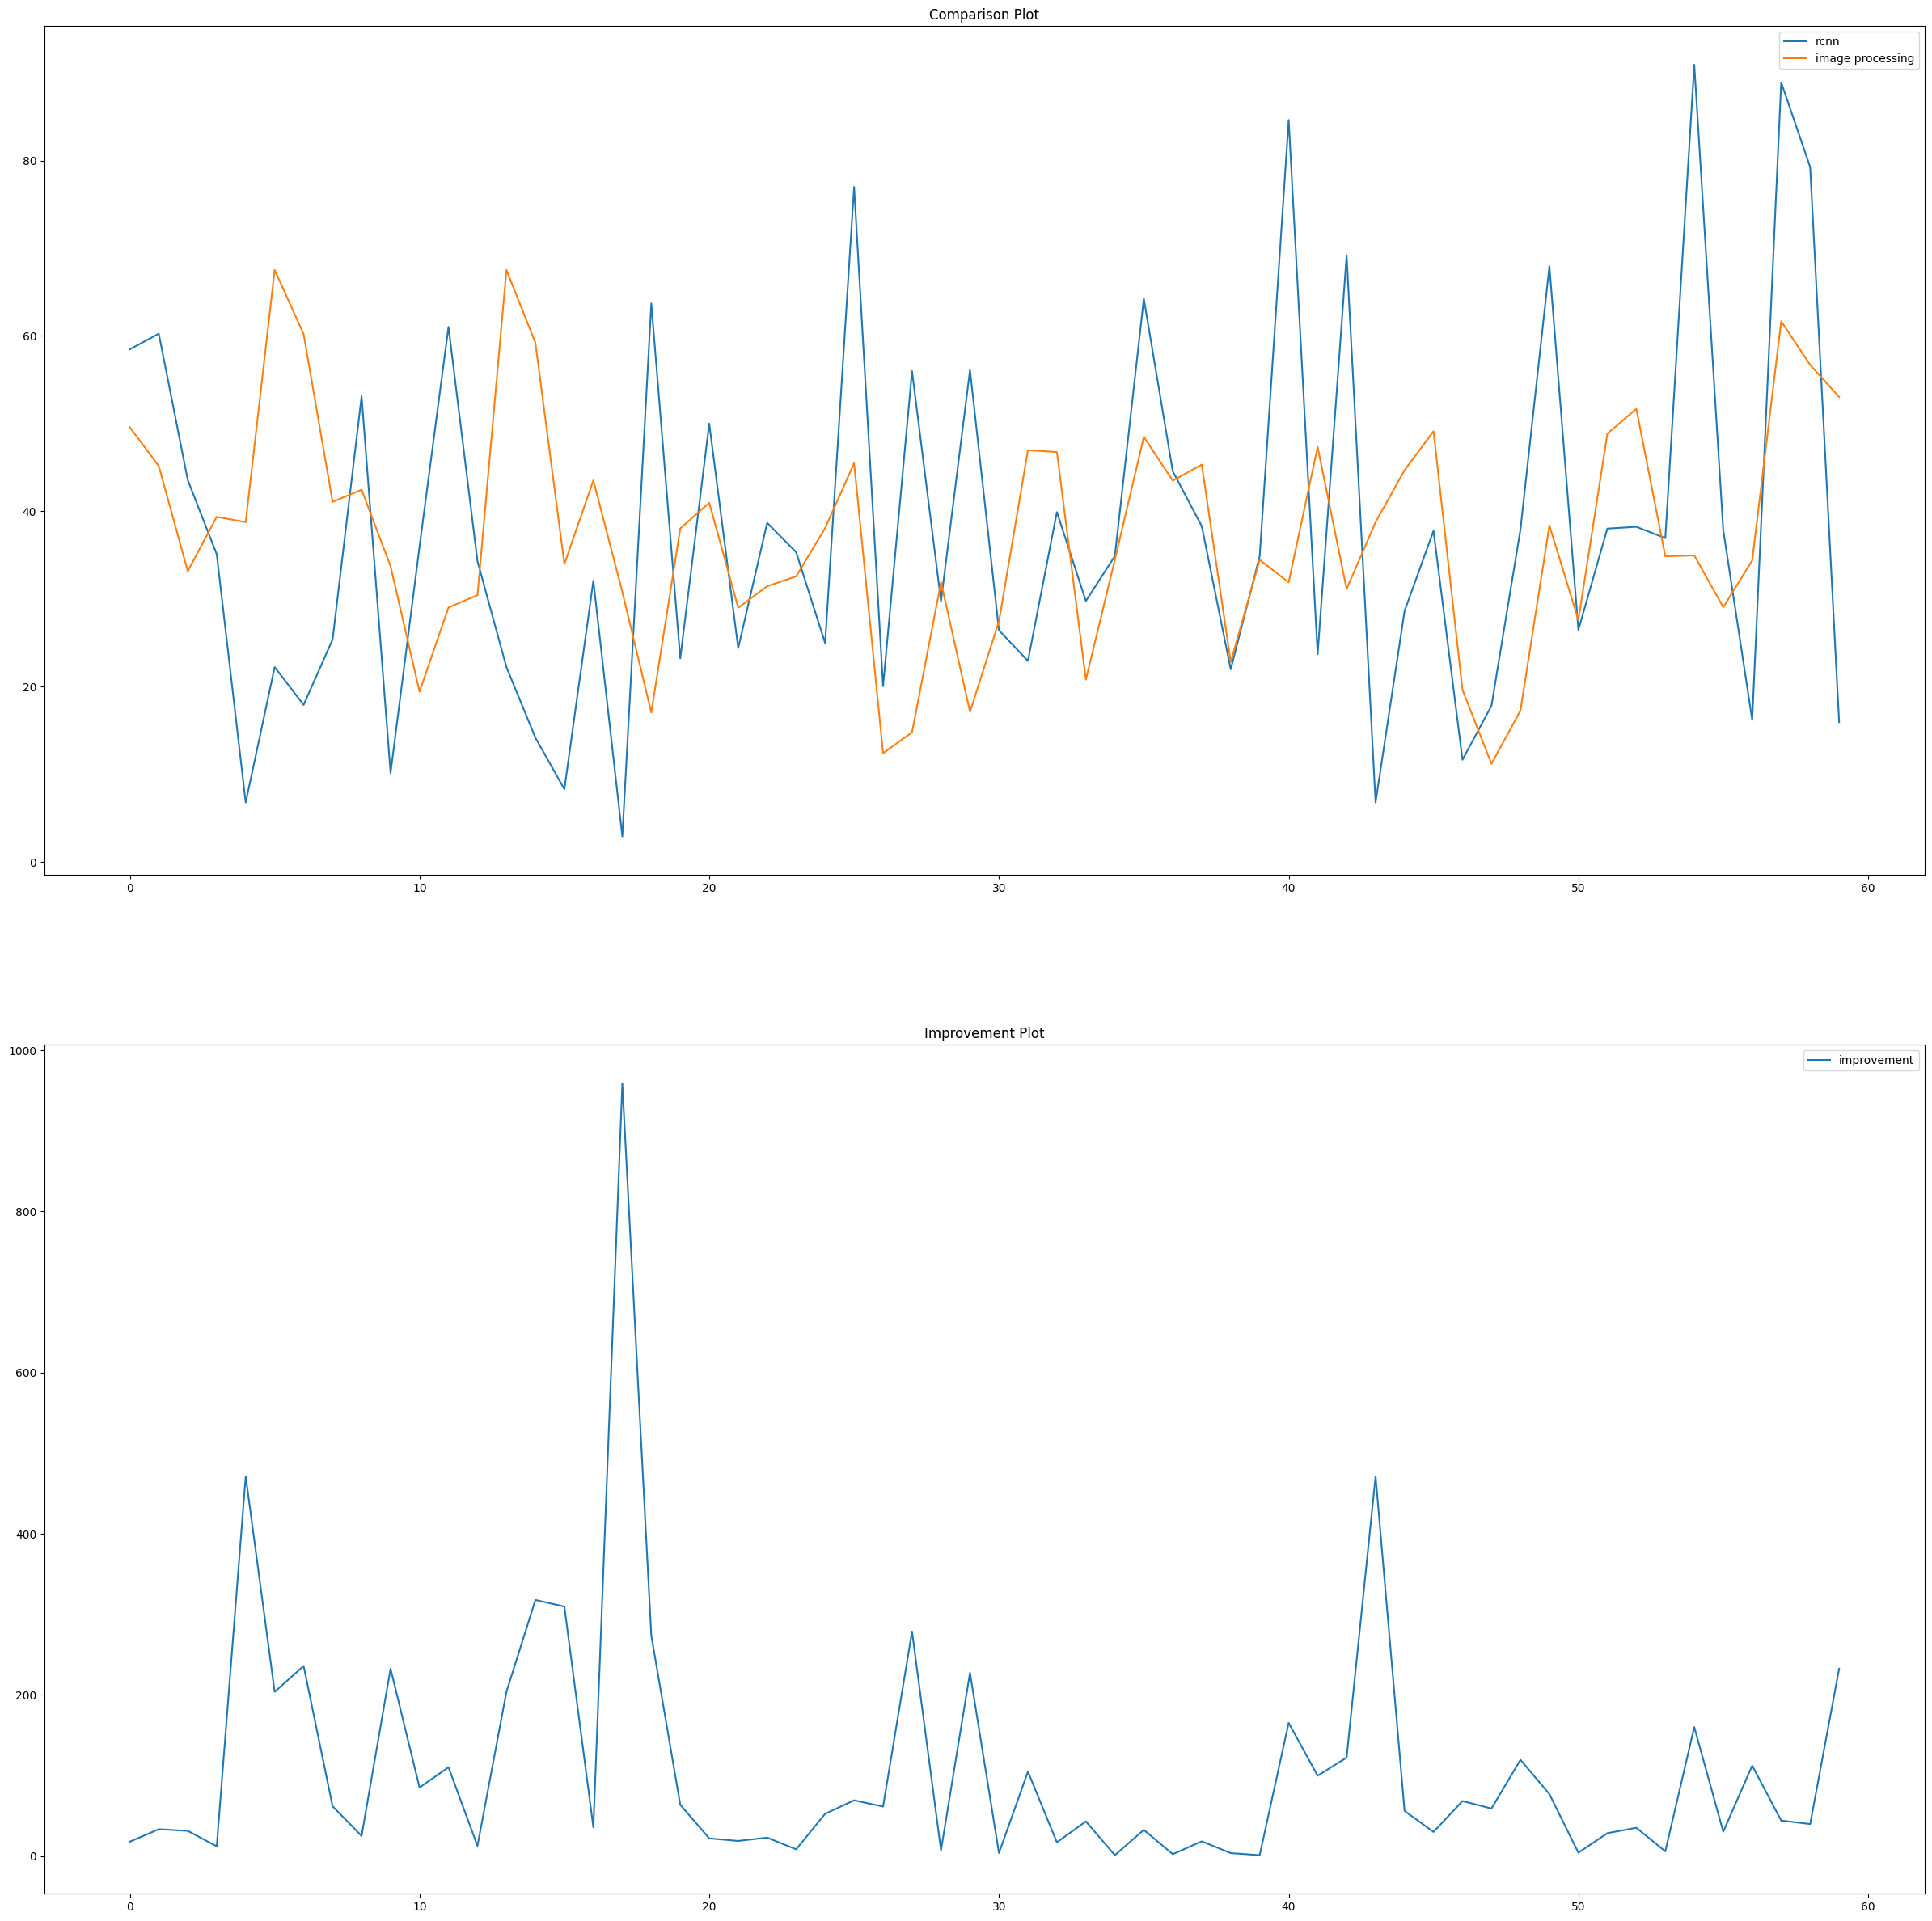

In [ ]:
plotImprovemnet(img_dict, 60)

Average Improvement Gain : 143.58%



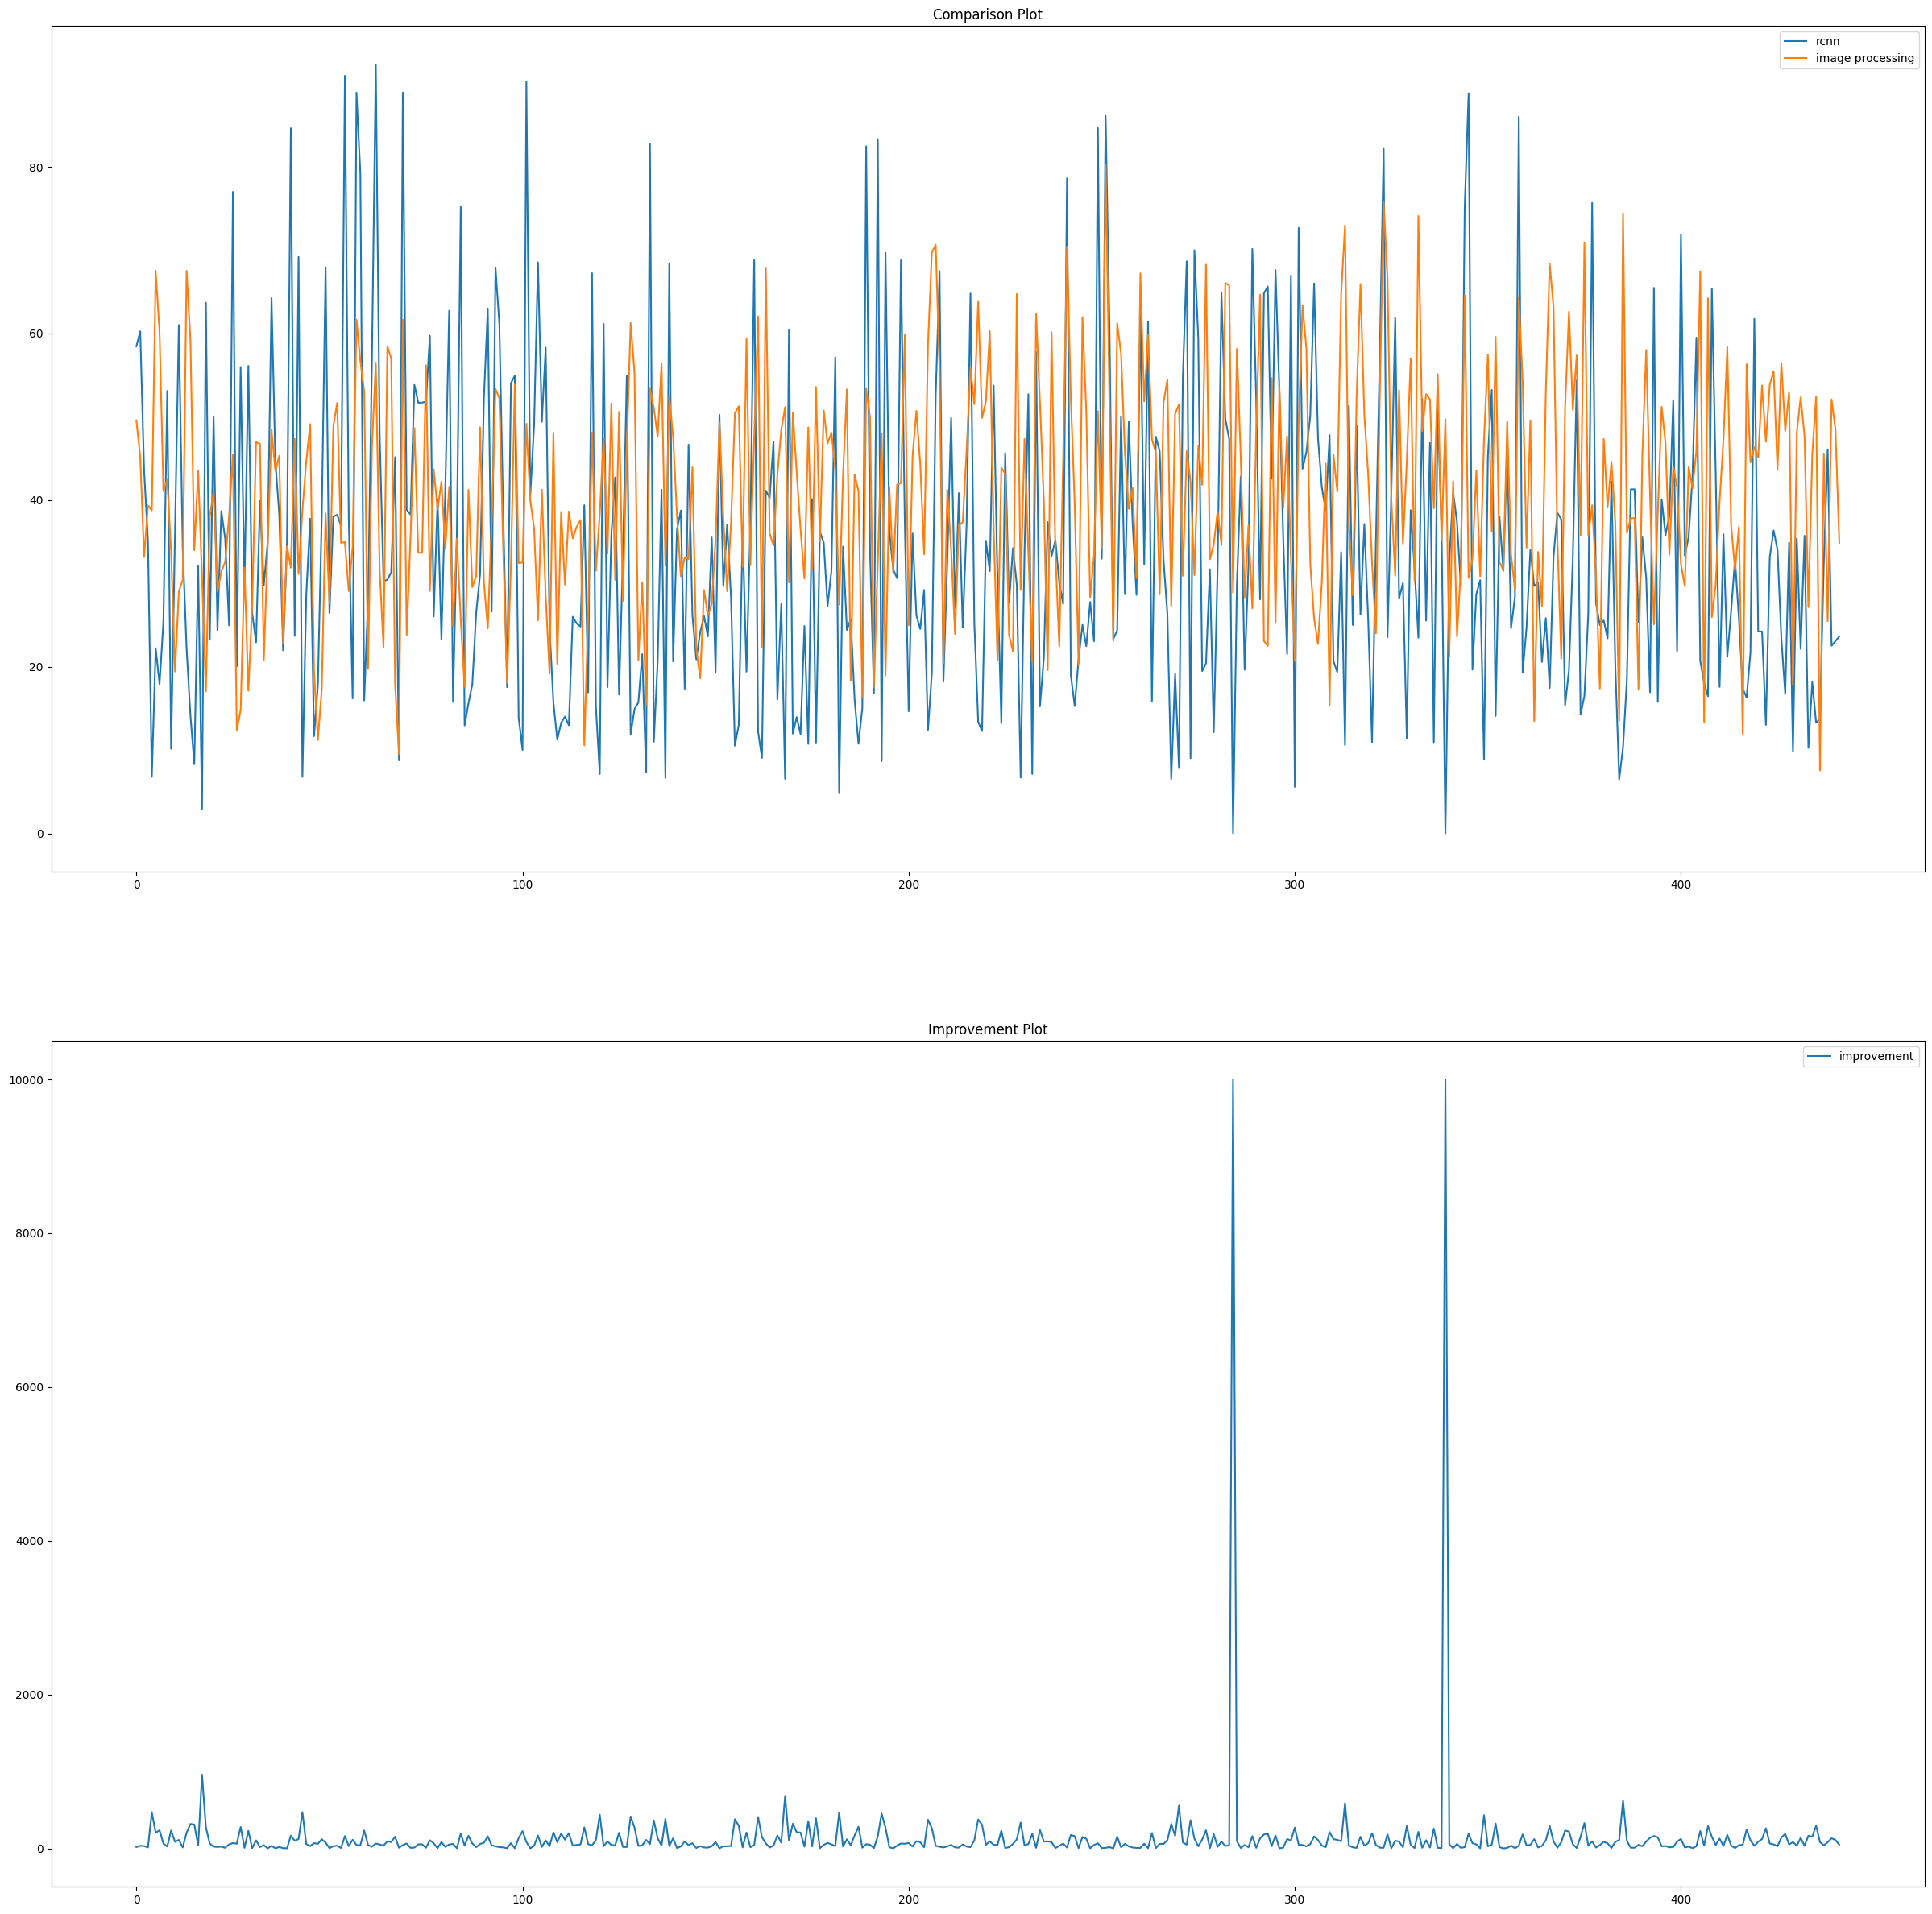

In [ ]:
plotImprovemnet(img_dict)

In [ ]:
import csv
FileName = []
Day = []
Area_Affected=[]
datasetPath = '/content/drive/MyDrive/ML/area_30days.csv'
with open(datasetPath, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        FileName.append(row['FileName']) 
        Day.append(int(row['Day']))
        Area_Affected.append(float(row['Area Affected (in %)']))
file_name = '46.jpg'
startPos = FileName.index(file_name)
endPos = len(FileName) - FileName[::-1].index(file_name)

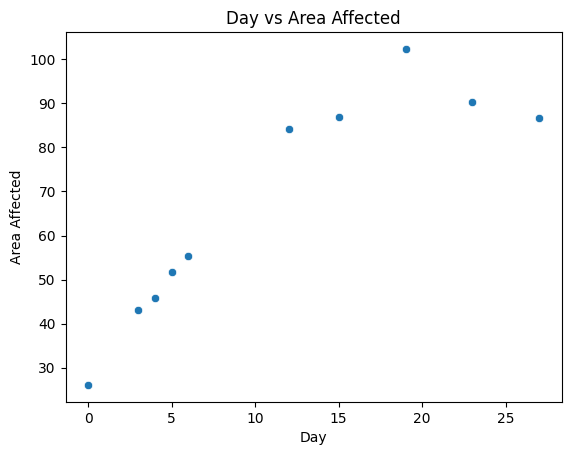

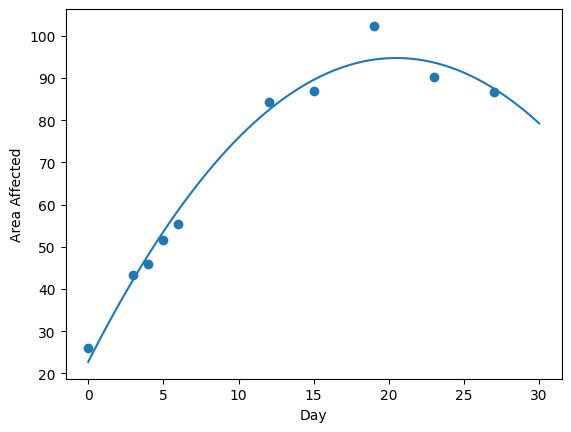


Model for the data :
         2
-0.1714 x + 7.027 x + 22.71

R-square value of the model : 0.9800531431478088



In [ ]:
import seaborn as sns
from sklearn.metrics import r2_score
import scipy.stats as stats

dataset = pd.read_csv(datasetPath)
dataset = dataset[startPos:endPos]
sns.scatterplot(data=dataset, x='Day', y='Area Affected (in %)')

plt.title('Day vs Area Affected')
plt.xlabel('Day')
plt.ylabel('Area Affected')
plt.show()

# degree 2 polynomial fit or quadratic fit
regressionModel = np.poly1d(np.polyfit(dataset['Day'], dataset['Area Affected (in %)'], 2))

# polynomial line visualization
polyline = np.linspace(0, 30, 100)
plt.scatter(dataset['Day'], dataset['Area Affected (in %)'])
plt.plot(polyline, regressionModel(polyline))
plt.xlabel('Day')
plt.ylabel('Area Affected')
plt.show()

print("\nModel for the data :")
print(regressionModel)

# r square metric
print("\nR-square value of the model : {val}\n".format(val=r2_score(dataset['Area Affected (in %)'], regressionModel(dataset['Day']))))

In [ ]:
day_to_predict_for = 8
print("Predicted percent of area affected on day {day} = {val} %".format(day=day_to_predict_for, val=round(regressionModel(day_to_predict_for), 2)))

Predicted percent of area affected on day 8 = 67.96 %
